In [26]:
# Initial imports
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [27]:
# Part 1.1 Loading data
file_path = Path("Starter_Code/myopia.csv")
df_myopia1 = pd.read_csv(file_path)
df_myopia1.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [28]:
#Part 1.2 remove MYOPIC Column
df_myopia = df_myopia1.drop('MYOPIC', axis=1)
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [29]:
#Part 1.3 Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_myopia)

In [30]:
scaled_data[0]

array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

In [31]:
#Part 2.1 Perform dimensionality reduction with PCA. 
pca = PCA(n_components=0.9)
myopia_pca = pca.fit_transform(scaled_data)
pca.explained_variance_ratio_
# How did the number of the features change? Dropped 5 features.


array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [32]:
#Part 2.2 Further reduce the dataset dimensions with t-SNE and visually inspect the results. 
    #To do this, run t-SNE on the principal components, which is the output of the PCA transformation.
tsne = TSNE(learning_rate=100)
transformed_features = tsne.fit_transform(myopia_pca)


C:\Users\Danielle\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [33]:
transformed_features.shape

(618, 2)

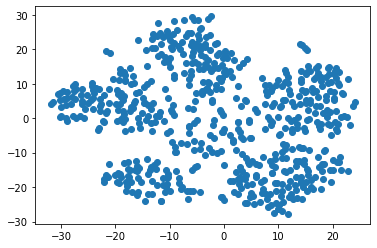

In [34]:
# Create a scatter plot of the t-SNE output. 
plt.scatter(transformed_features[:,0], transformed_features[:,1])
plt.show()

In [35]:
labels = df_myopia1['MYOPIC']

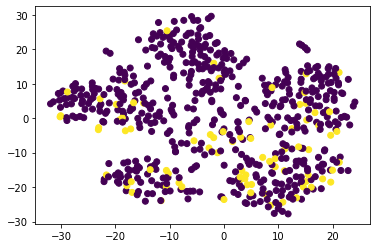

In [36]:
#Are there distinct clusters? No
plt.scatter(transformed_features[:,0], transformed_features[:,1], c=labels)
plt.show()

In [39]:
#Create an elbow plot to identify the best number of clusters. Make sure to do the following:
inertia = []
k = list(range(1, 11))
#Use a for loop to determine the inertia for each k between 1 through 10.
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(myopia_pca)
    inertia.append(km.inertia_)
#If possible, determine where the elbow of the plot is, and at which value of k it appears.
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()



C:\Users\Danielle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,7948.905345
1,2,6794.293482
2,3,6030.953812
3,4,5662.799045
4,5,5381.970825


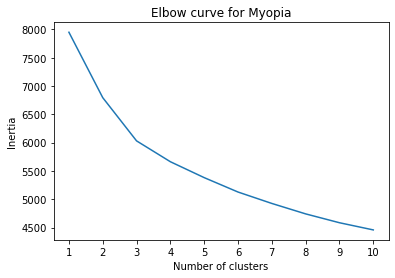

In [40]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Myopia')
plt.show()

In [ ]:
#Based on your findings, write up a brief (one or two sentences) recommendation for your supervisor in your Jupyter Notebook. 
#Can the patients be clustered? If so, into how many clusters?